# 
# Machine Learning in End-to-End Big Data - 2 (Uçtan Uca Büyük Veride Makine Öğrenmesi - 2)

In [1]:
import findspark as fs    

fs.init("C:\spark")   # Starting Spark 

In [2]:
import matplotlib.pyplot as splt     # Getting data visualization libraries
import seaborn as sns

In [3]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf          # Generating Spark Session to make process
from pyspark import SparkContext


spark = SparkSession.builder.master("local").appName("machine_learning_on_spark").config("spark.executer.memory","16gb").getOrCreate()

start_spark = spark.sparkContext
start_spark


<SparkContext master=local appName=machine_learning_on_spark>

# 

In [4]:
spark_df = spark.read.csv("churn.csv", header=True, inferSchema=True, sep = ",")   # Reading Dataset

spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [5]:
spark_df.printSchema()    # Types of variables

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [6]:
spark_df.show()

+---+-------------------+----+--------------+---------------+-----+---------+-----+
|_c0|              Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+-------------------+----+--------------+---------------+-----+---------+-----+
|  0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|     Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
|  5|   Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|
|  6|        Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|
|  7|      Zachary Walsh|32.0|       9885.12|              1| 6.92|      9.0|    1|
|  8|        Ashlee Carr|43.0|       14062.6|              1| 5.46|     11.0

# 

In [7]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])     # The process of converting variables to lowercase

In [8]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [9]:
# df.columns = map(str.lower, df.columns)   # Other way to make lowercase process

# 

In [10]:
spark_df = spark_df.withColumnRenamed("_c0","index")    # Rename variable name

spark_df.show(4)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 4 rows



In [11]:
spark_df.count()    # All data number in Spark dataset

900

In [12]:
spark_df.columns    # Variable name in Dataset

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [13]:
spark_df.distinct().count()     # Unique data count

900

In [14]:
spark_df.select("names").distinct().count()    # Unique data count in names column

899

In [15]:
spark_df.groupby("names").count().sort("count", ascending=False).show(5) 

# There are 2 Jennifers. We'll see if there are other people with the same name.

+----------------+-----+
|           names|count|
+----------------+-----+
|   Jennifer Wood|    2|
|   David Compton|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
|     John Barber|    1|
+----------------+-----+
only showing top 5 rows



In [16]:
spark_df.filter(spark_df.names == "Jennifer Wood").show()     # Two different people with the same name.

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [17]:
spark_df.dropDuplicates().groupBy("names").count().sort("count",ascending=False).show(4)

# We deleted the same values with the .dropDuplicates() method and only the unique values remained.

+----------------+-----+
|           names|count|
+----------------+-----+
|   Jennifer Wood|    2|
|     John Barber|    1|
|Patrick Robinson|    1|
|    Patrick Bell|    1|
+----------------+-----+
only showing top 4 rows



In [18]:
spark_df.where(spark_df.index == 439).select("names").show()    # Getting data from index in Spark_df

+-------------+
|        names|
+-------------+
|Jennifer Wood|
+-------------+



In [19]:
spark_df.where(spark_df.index == 439).collect()[0]["age"]    # Taking data in Spark as input

48.0

In [20]:
spark_df.where(spark_df.index == 439).collect()[0]["names"]   # Taking data in Spark as input

'Jennifer Wood'

# 

## Discovery Data Analysis  (Keşifçi Veri Analizi)

# 

In [22]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [23]:
spark_df.select("age","total_purchase","account_manager","years","num_sites","churn").describe().toPandas()

# Showing more attractive data table

,summary,age,total_purchase,account_manager,years,num_sites,churn
0,count,900,900,900,900,900,900
1,mean,41.81666666666667,10062.82403333334,0.4811111111111111,5.27315555555555,8.587777777777777,0.16666666666666666
2,stddev,6.127560416916251,2408.644531858096,0.4999208935073339,1.274449013194616,1.7648355920350969,0.3728852122772358
3,min,22.0,100.0,0,1.0,3.0,0
4,max,65.0,18026.01,1,9.15,14.0,1


In [24]:
spark_df.filter(spark_df.age > 47).count()

161

In [25]:
spark_df.groupby("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [26]:
spark_df.groupby("churn").agg({"total_purchase": "mean"}).show()

+-----+-------------------+
|churn|avg(total_purchase)|
+-----+-------------------+
|    1| 10192.179933333337|
|    0| 10036.952853333332|
+-----+-------------------+



In [27]:
spark_df.groupby("churn").agg({"years": "mean"}).show()

+-----+------------------+
|churn|        avg(years)|
+-----+------------------+
|    1|5.8835999999999995|
|    0|5.1510666666666625|
+-----+------------------+



In [35]:
cor_data = spark_df.drop("index","names").toPandas()   # Droping or deleting unnecessary columns from spark_df to investigate corelations


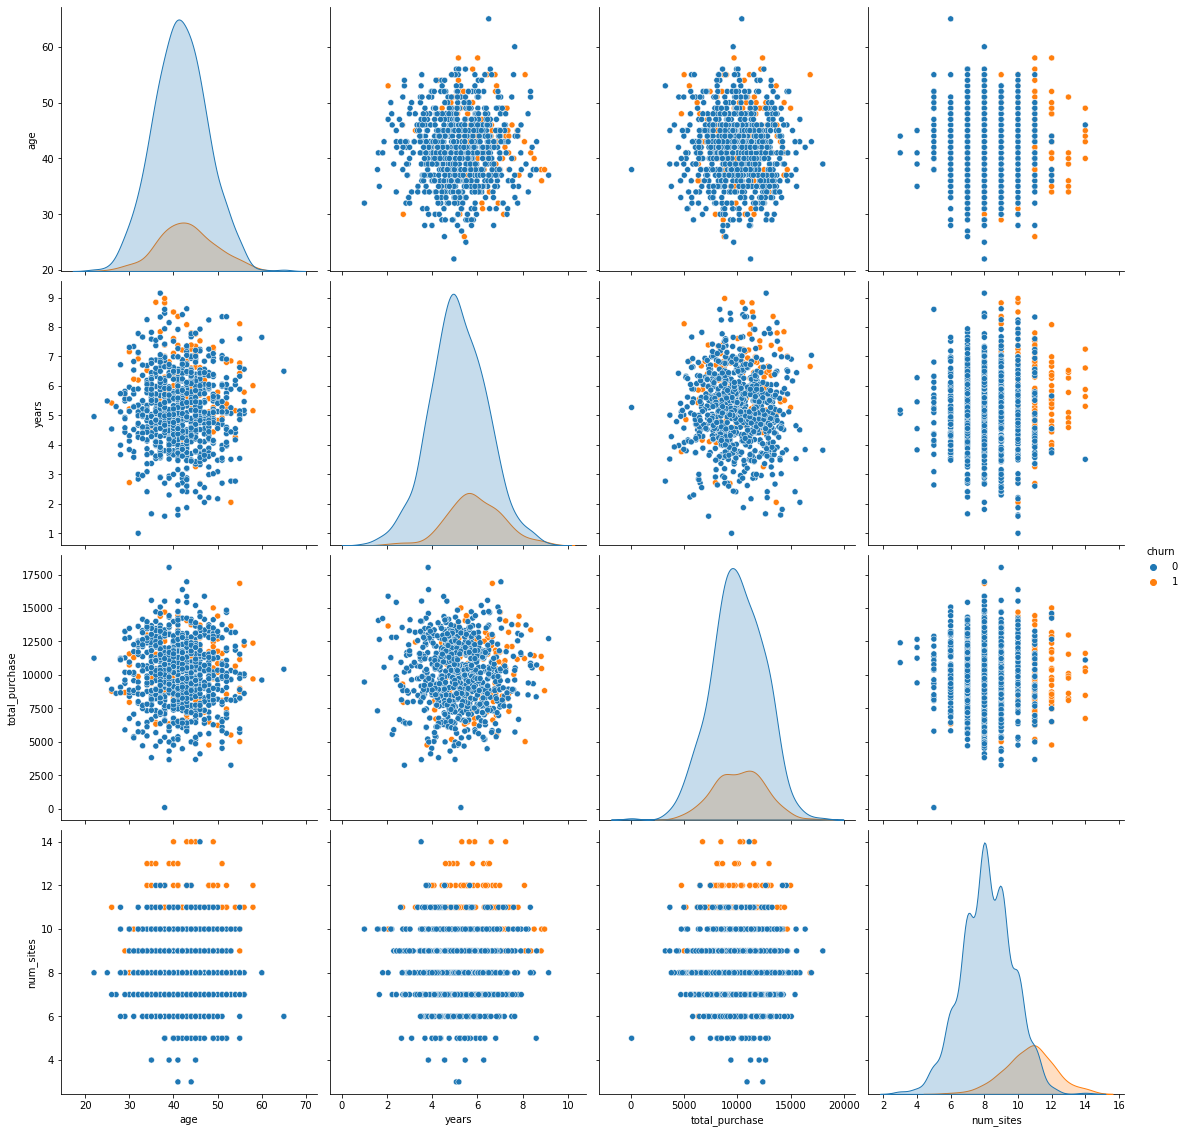

In [44]:
import seaborn as sns    # Data Visualization Library 

sns.pairplot(cor_data, vars= ["age","years","total_purchase","num_sites"], hue = "churn",height=4);

# 

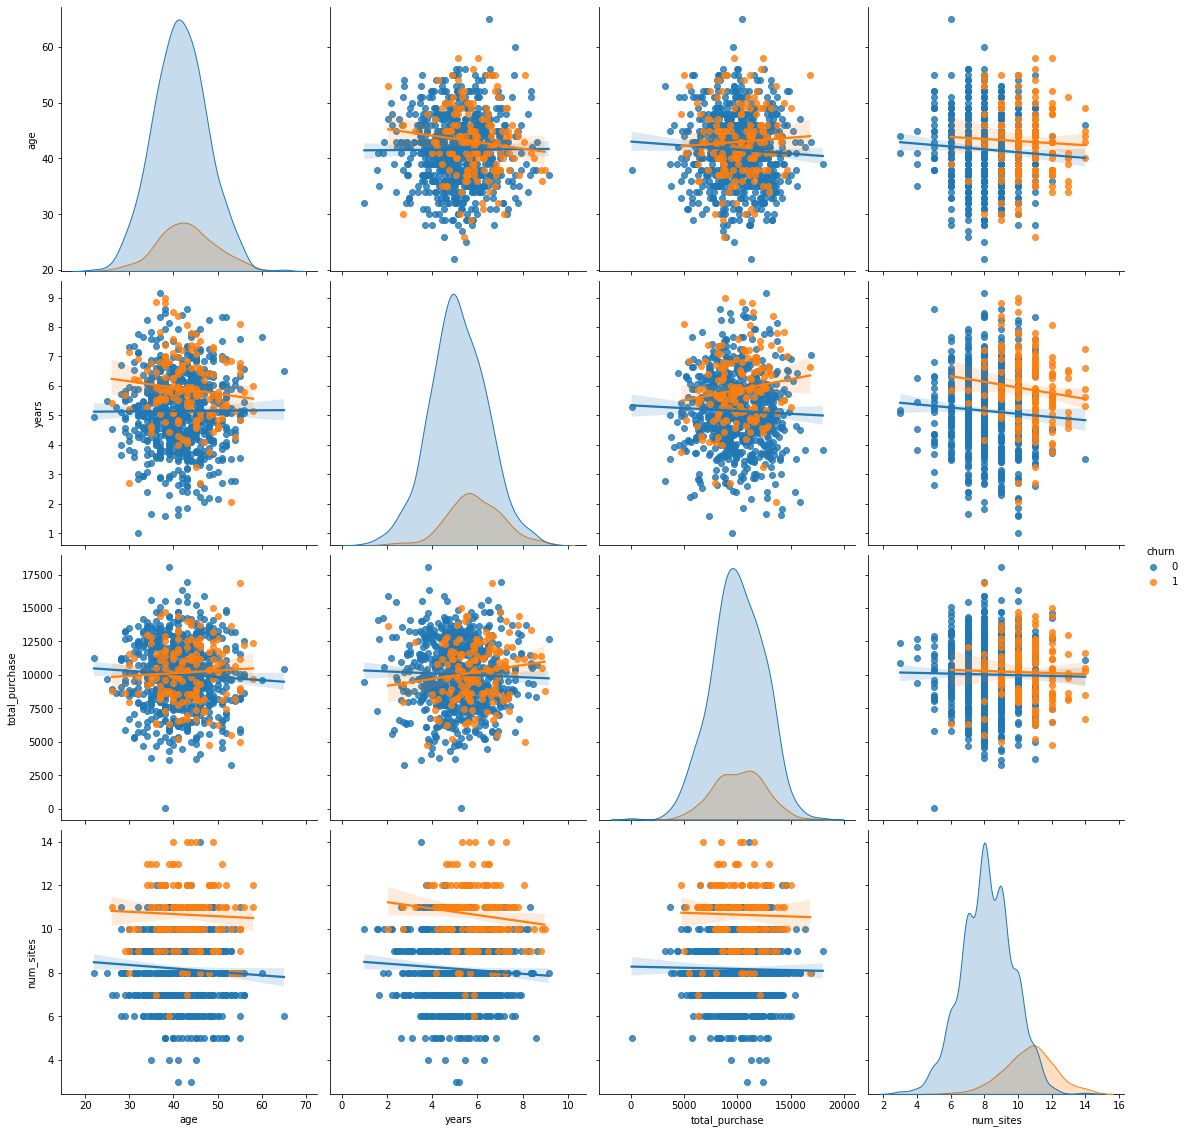

In [43]:
sns.pairplot(cor_data, vars= ["age","years","total_purchase","num_sites"], hue = "churn", kind="reg",height=4);    # Adding Regression Graph